In [1]:
log_lik_weibull <- function( data, param){
  -sum(dweibull(data, shape = param[1], scale = param[2], log = TRUE))
}

In [2]:
y <- c(155.9, 200.2, 143.8, 150.1,152.1, 142.2, 147, 146, 146,
 170.3, 148, 140, 118, 144, 97)
n <- length(y)

 #define parameters grid
 gamma <- seq(0.1, 15, length=100)
 beta <- seq(100,200, length=100)
 parvalues <- expand.grid(gamma,beta)
 llikvalues <- apply(parvalues, 1, log_lik_weibull, data=y)
 llikvalues <- matrix(-llikvalues, nrow=length(gamma), ncol=length(beta),
 byrow=F)
 conf.levels <- c(0,0.5,0.75,0.9,0.95,0.99)


In [3]:
gammahat<-uniroot(function(x) n/x+sum(log(y))-n*
 sum(y^x*log(y))/sum(y^x),
 c(1e-5,15))$root
 betahat<- mean(y^gammahat)^(1/gammahat)
 weib.y.mle<-c(gammahat,betahat)
 #first element is the MLE for the shape gamma, second element the MLE for the scale beta
 weib.y.mle

[1]   6.886215 155.948671

In [4]:
#observed information matrix
 jhat<-matrix(NA,nrow=2,ncol=2)
 jhat[1,1]<-n/gammahat^2+sum((y/betahat)^gammahat*
 (log(y/betahat))^2)
 jhat[1,2]<-jhat[2,1]<- n/betahat-sum(y^gammahat/betahat^(gammahat+1)*
 (gammahat*log(y/betahat)+1))
 jhat[2,2]<- -n*gammahat/betahat^2+gammahat*(gammahat+1)/
 betahat^(gammahat+2)*sum(y^gammahat)
 solve(jhat)


1.543250,2.550504
2.550504,38.406106


In [5]:
#se of the mle
 mle.se<-sqrt(diag(solve(jhat)))
 mle.se

[1] 1.242276 6.197266

In [6]:
weib.y.nlm<-nlm(log_lik_weibull,c(2,5),hessian=T,data=y)
weib.y.nlm

Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull, c(2, 5), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull, c(2, 5), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull, c(2, 5), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull, c(2, 5), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”

0.72786284,-0.04826345
-0.04826345,0.02921869


In [7]:
weib.y.se <- sqrt(diag(solve(weib.y.nlm$hessian)))
weib.y.se-mle.se


[1] -0.0001516571  0.0022750403

## Exercise LAB 3.7

In [8]:
library(rstan)
#true mean
theta_sample <- 2
#likelihood variance
sigma2 <- 2
#sample size
n <- 10
#prior mean
mu <- 7
#prior variance
tau2 <- 2
#generate some data
set.seed(123)
y <- rnorm(n,theta_sample, sqrt(sigma2))
#launch Stan model
data<- list(N=n, y=y, sigma =sqrt(sigma2), mu = mu, tau = sqrt(tau2))
fit <- stan(file="normal.stan", data = data, chains = 4, iter=2000)
fit

Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



SAMPLING FOR MODEL 'normal' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 8e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.005915 seconds (Warm-up)
Chain 1:                0.00663 seconds (Sampling)
Chain 1:                0.012

Inference for Stan model: normal.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta   2.55    0.01 0.43   1.73   2.26   2.54   2.84   3.41  1514    1
lp__  -23.98    0.02 0.74 -26.07 -24.15 -23.70 -23.51 -23.46  1759    1

Samples were drawn using NUTS(diag_e) at Wed May  1 01:53:11 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

fit objects is an inference object, data can be extracted with extract(fit), returning a list object that contains \$theta and \$lp__ .

extract(fit)$theta is a list of 4000 doubles.



In [9]:
#returns a 1000x4x2 array
posterior <- as.array(fit)


In [10]:
dimnames(posterior)

$iterations
NULL

$chains
[1] "chain:1" "chain:2" "chain:3" "chain:4"

$parameters
[1] "theta" "lp__"

In [11]:
library(bayesplot)

This is bayesplot version 1.6.0
- Online documentation and vignettes at mc-stan.org/bayesplot
- bayesplot theme set to bayesplot::theme_default()
   * Does _not_ affect other ggplot2 plots
   * See ?bayesplot_theme_set for details on theme setting


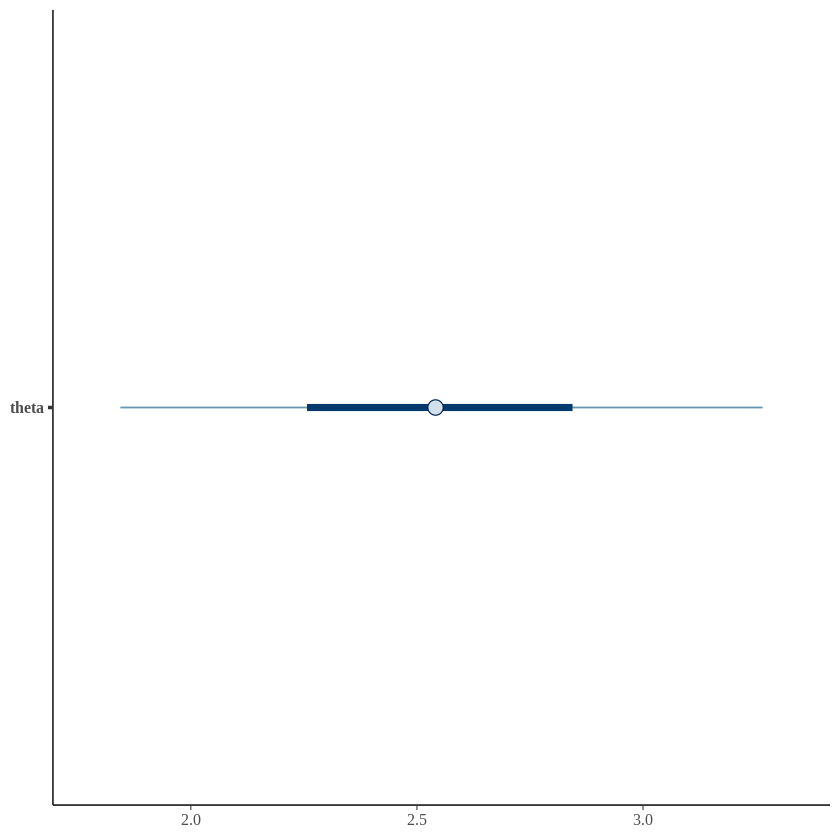

In [12]:
mcmc_intervals(posterior, par="theta" )

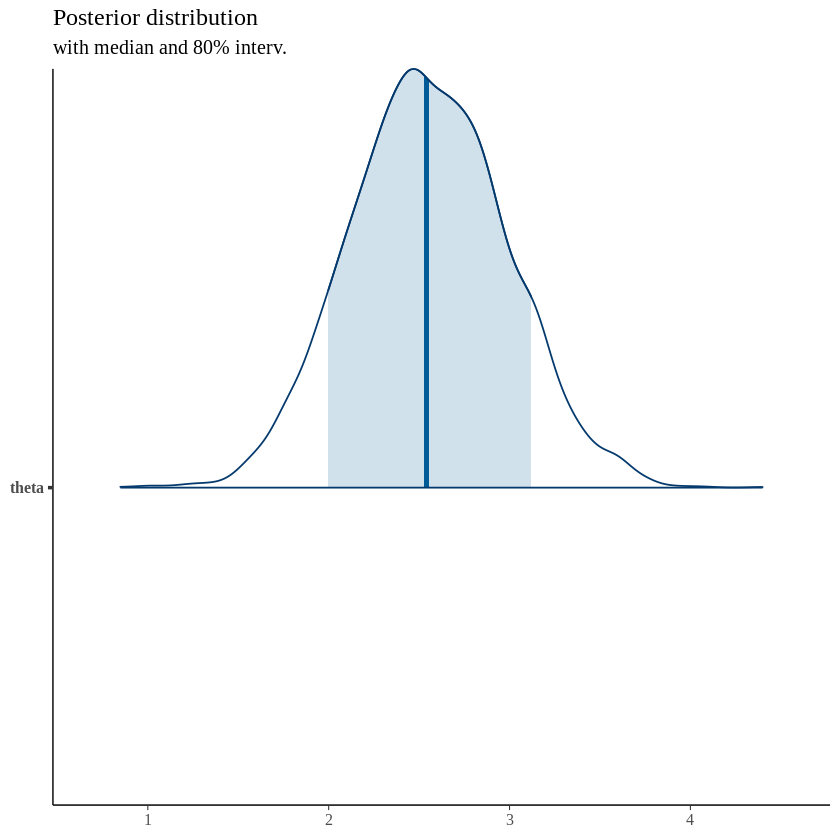

In [13]:
plot_title <- ggtitle("Posterior distribution","with median and 80% interv.")
mcmc_areas(posterior, pars = c("theta"), prob = .8 )+plot_title

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


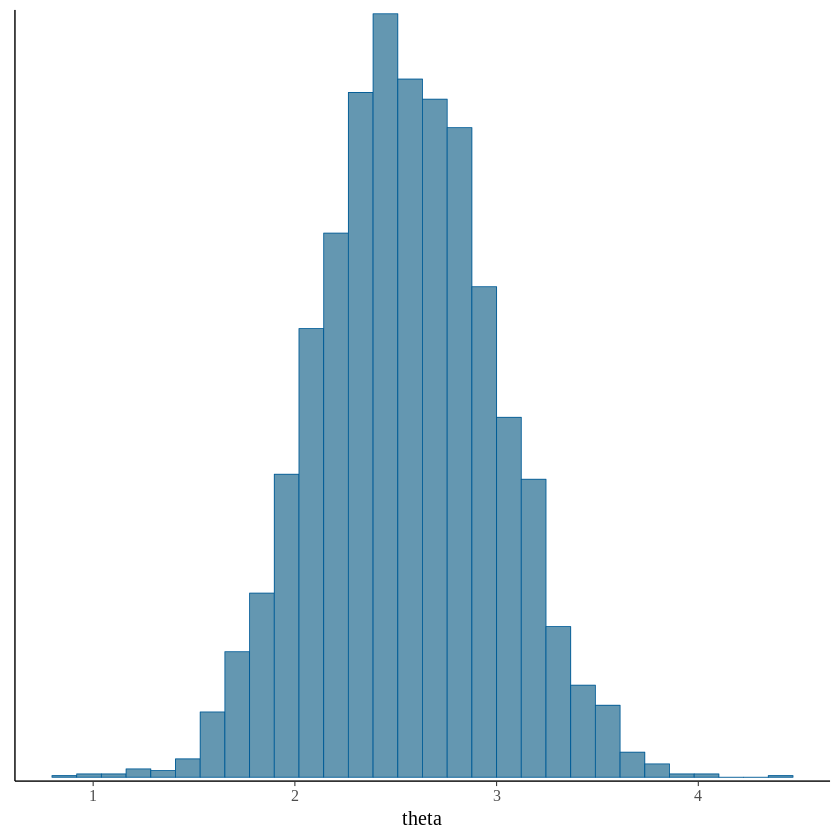

In [14]:
mcmc_hist(posterior, par ="theta")

## Exercise LAB 3.1

Use nlm to compute the variance for the estimator $\hat w=(log(\hat \omega),log(\hat \beta))$ and optimHess for the variance of $\hat\theta=(\hat\omega,\hat\beta)$.

In [15]:
omega <- function(theta) log(theta)
theta <- function(omega) exp(omega)
log_lik_weibull_rep <- function(data, param) log_lik_weibull(data, theta(param))
weib.y.nlm<-nlm(log_lik_weibull_rep,c(2,5),hessian=T,data=y)
weib.y.nlm

Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(2, 5), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in nlm(log_lik_weibull_rep, c(2, 5), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(2, 5), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning message in nlm(log_lik_weibull_rep, c(2, 5), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in nlm(log_lik_weibull_rep, c(2, 5), hessian = T, data = y):
“NA/Inf replaced by maximum positive value”Warning message in dweibull(data, shape = param[1], scale = param[2], log = TRUE):
“NaNs produced”Warning 

17.321993,-6.632514
-6.632514,27.281593


In [16]:
#computing part 1
diag(solve(weib.y.nlm$hessian))

[1] 0.06365558 0.04041705

In [17]:
weib.y.oh <- optimHess(c(2,5),log_lik_weibull_rep,c(2,5))

ERROR: Error in gr(par, ...): could not find function "gr"


## exercise 5

if

$$\mu^* = \frac{\frac{n}{\sigma^2} \bar y + \frac{1}{\tau^2}\mu }{\frac{n}{\sigma^2}+\frac{1}{\tau^2}}$$

$$\mu^* = \tau_n^2 \left( \frac{n}{\sigma^2} \bar y + \frac{1}{\tau^2} \mu \right)$$  where$$ \tau_n^2 = \frac{1}{\frac{n}{\sigma^2}+\frac{1}{\tau^2}}$$

let's call $ a = \frac{n}{\sigma^2}$ and $b=\frac{1}{\tau^2}$:

$$ \mu* = \frac{a \bar y + b \mu}{a+b} = \mu + \alpha $$

$$ a \bar y + b \mu = (\mu + \alpha) (a+b)$$
$$ a \bar y + b \mu = \mu (a+b) + \alpha(a+b) $$
$$ a \bar y =\mu a + \alpha (a+b)$$

$$ \alpha) = \frac{a (\bar y - \mu)}{a+b}$$

so

$$ \mu^* = \mu + (\bar y - \mu) \frac{\frac{n}{\sigma^2}}{\frac{n}{\sigma^2}+\frac{1}{\tau^2}}$$



$$ \mu^* = \bar y - (\bar y - \mu)\frac {n \tau^2}{\sigma^2+n\tau^2}$$

that can be read as the prior mean with ad adjustment towards the sample mean. Accordingly:

$$ \mu^* = \mu + (\bar y - \mu) \frac{n\tau^2}{\sigma^2+n\tau^2}$$

where $(\bar y - \mu) \frac{n\tau^2}{\sigma^2+n\tau^2}$ is the contribution of the data in the update of the mean, made evident when the equation is written in this form.

# Exercise 10 : Model comparison

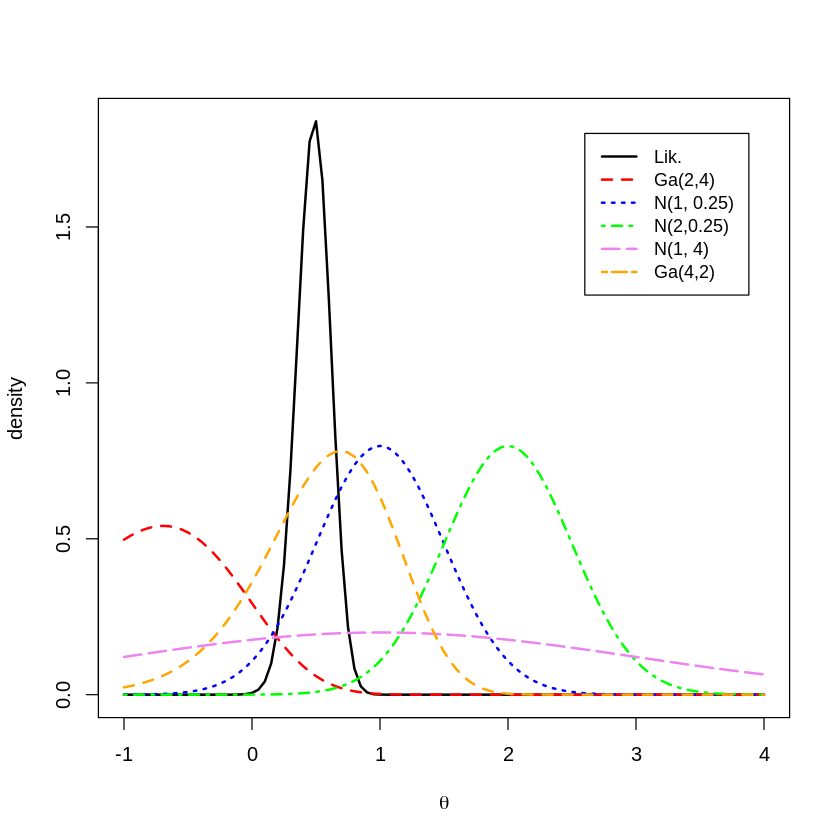

In [18]:
library(LearnBayes)
data(soccergoals)

y <- soccergoals$goals

#write the likelihood function via the gamma distribution


lik_pois<- function(data, theta){
  n <- length(data)
  lambda <- exp(theta)
  dgamma(lambda, shape =sum(data)+1, scale=1/n)
}

 prior_gamma <- function(par, theta){
  lambda <- exp(theta)
  dgamma(lambda, par[1], rate=par[2])*lambda  
}

 prior_norm <- function(npar, theta){
 lambda=exp(theta)  
 (dnorm(theta, npar[1], npar[2]))
  
}

lik_pois_v <- Vectorize(lik_pois, "theta")
prior_gamma_v <- Vectorize(prior_gamma, "theta")
prior_norm_v <- Vectorize(prior_norm, "theta")


#likelihood
 curve(lik_pois_v(theta=x, data=y), xlim=c(-1,4), xlab=expression(theta), ylab = "density", lwd =2 )
#prior 1
 curve(prior_gamma_v(theta=x, par=c(2,4)), lty =2, col="red", add = TRUE, lwd =2)
#prior 2 
 curve(prior_norm_v(theta=x, npar=c(1, .5)), lty =3, col="blue", add =TRUE, lwd=2)
#prior 3 
 curve(prior_norm_v(theta=x, npar=c(2, .5)), lty =4, col="green", add =TRUE, lwd =2)
#prior 4 
  curve(prior_norm_v(theta=x, npar=c(1, 2)), lty =5, col="violet", add =TRUE, lwd =2)
  legend(2.6, 1.8, c("Lik.", "Ga(2,4)", "N(1, 0.25)", "N(2,0.25)","N(1, 4)", "Ga(4,2)" ),
  lty=c(1,2,3,4,5,6), col=c("black", "red", "blue", "green", "violet", "orange"),lwd=2, cex=0.9)
#prior extra
 curve(prior_gamma_v(theta=x, par=c(4,2)), lty =2, col="orange", add = TRUE, lwd =2)


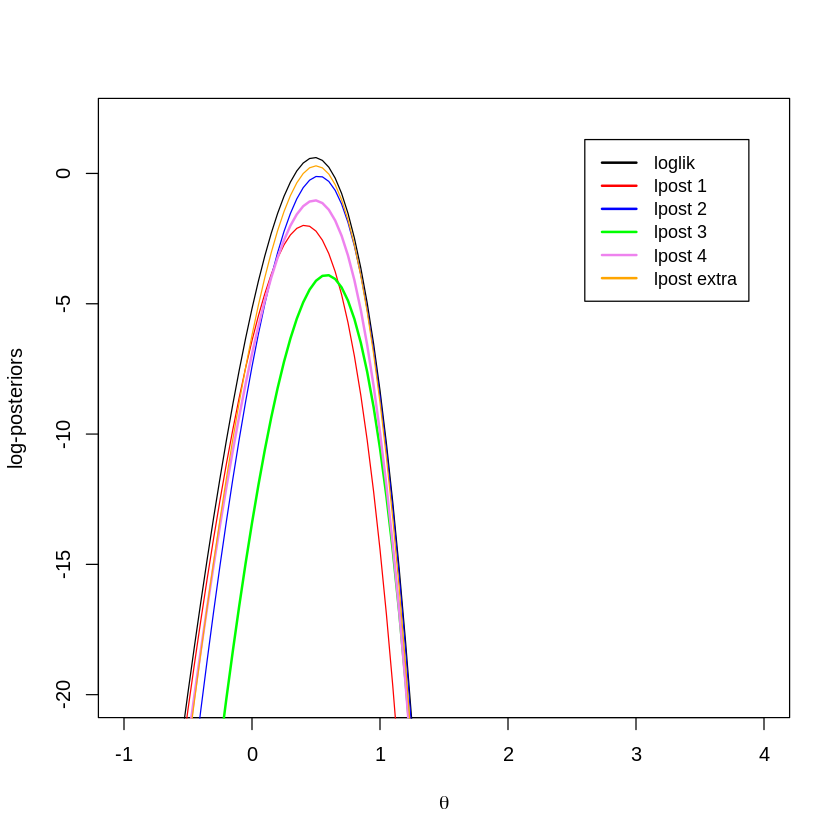

In [19]:
logpoissongamma <- function(theta, datapar){
   data <- datapar$data
   par <- datapar$par
   lambda <- exp(theta)
   log_lik <- log(lik_pois(data, theta))
   log_prior <- log(prior_gamma(par, theta))
   return(log_lik+log_prior)
}

logpoissongamma.v <- Vectorize( logpoissongamma, "theta")


logpoissonnormal <- function( theta, datapar){
 data <- datapar$data
 npar <- datapar$par
 lambda <- exp(theta)
 log_lik <- log(lik_pois(data, theta))
 log_prior <- log(prior_norm(npar, theta))
  return(log_lik+log_prior)
}  
logpoissonnormal.v <- Vectorize( logpoissonnormal, "theta")

#log-likelihood
curve(log(lik_pois(y, theta=x)), xlim=c(-1,4),ylim=c(-20,2), lty =1,
   ylab="log-posteriors", xlab=expression(theta))
#log posterior 1
curve(logpoissongamma.v(theta=x, list(data=y, par=c(2,4))), col="red", xlim=c(-1,4),ylim=c(-20,2), lty =1, add =TRUE)
#log posterior 2
 curve(logpoissonnormal.v( theta=x, datapar <- list(data=y, par=c(1, .5))), lty =1, col="blue",  add =TRUE)
#log posterior 3
 curve(logpoissonnormal.v( theta=x, datapar <- list(data=y, par=c(2, .5))), lty =1, col="green", add =TRUE, lwd =2)
#log posterior 4
  curve(logpoissonnormal.v( theta=x, list(data=y, par=c(1, 2))), lty =1, col="violet", add =TRUE, lwd =2)
 legend(2.6, 1.3, c( "loglik", "lpost 1", "lpost 2", "lpost 3", "lpost 4", "lpost extra" ),
  lty=1, col=c("black", "red", "blue", "green", "violet","orange"),lwd=2, cex=0.9)
#log posterior extra
curve(logpoissongamma.v(theta=x, list(data=y, par=c(4,2))), col="orange", xlim=c(-1,4),ylim=c(-20,2), lty =1, add =TRUE)

In [20]:
datapar <- list(data=y, par=c(2,4))
fit1 <- laplace(logpoissongamma, .5, datapar)
datapar <- list(data=y, par=c(1, .5))
fit2 <- laplace(logpoissonnormal, .5, datapar)
datapar <- list(data=y, par=c(2, .5))
fit3 <- laplace(logpoissonnormal, .5, datapar)
datapar <- list(data=y, par=c(1, 2))
fit4 <- laplace(logpoissonnormal, .5, datapar)
datapar <- list(data=y, par=c(4,2))
fitextra <- laplace(logpoissongamma, .5, datapar)

postmode <- c(fit1$mode, fit2$mode, fit3$mode, fit4$mode, fitextra$mode )
postsds <- sqrt(c(fit1$var, fit2$var, fit3$var, fit4$var, fitextra$var))
logmarg <- c(fit1$int, fit2$int, fit3$int, fit4$int, fitextra$int)
cbind(postmode, postsds, logmarg)



postmode,postsds,logmarg
0.4139648,0.1301896,-3.1083249
0.5207825,0.1260712,-1.2551710
0.5825195,0.1224723,-5.0763156
0.4899414,0.1320165,-2.1372163
0.4999512,0.1280372,-0.8440147


In [21]:
BF_matrix <- matrix(1, 5,5)
for (i in 1:4){
  for (j in 2:5){
   BF_matrix[i,j]<- exp(logmarg[i]-logmarg[j])
   BF_matrix[j,i]=(1/BF_matrix[i,j]) 
  }
}

round_bf <- round(BF_matrix,3)
round_bf

1.000,0.157,7.156,0.379,0.104
6.380,1.000,45.656,2.416,0.663
0.140,0.022,1.000,0.053,0.015
2.641,0.414,18.899,1.000,0.274
9.624,1.509,68.876,3.644,1.000


### Comment

Prior 2 is still the most favored. $Gamma(2,4)$ distribution is even worse than $Gamma(4.57, 1.43)$.

Note: $Gamma(4,2)$ was added as extra test and appears to be more favorable than all the others. 

## Exercise 11

```
data {
  int<lower=1> N;           	// n. of observations;
  int<lower=0, upper=N> k;   	// n. of successes;
}
parameters{
  real<lower=0, upper=1> theta;  	// p. of success;
}
model{
  theta ~ beta(3,3);            	// prior
  k ~ binomial(N,theta);         	// likelihood
}
```

In [27]:
library(rstan)

#```
#Stan model: betabinomial.stan
#
# data {
#	int<lower=1> N;           	// n. of observations;
# 	int<lower=0, upper=N> k;   	// n. of successes;
# }
# parameters{
#   	real<lower=0, upper=1> theta;  	// p. of success;
# }
# model{
#  	theta ~ beta(3,3);            	// prior
#  	k ~ binomial(N,theta);         	// likelihood
# }
#```
       
y <- c(1,0,0,1,0,0,0,0,0,1,0,0,1,0)
n <- 14
fit <- stan(file="betabinomial.stan", data = list(k=4, N=14))


SAMPLING FOR MODEL 'betabinomial' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.006397 seconds (Warm-up)
Chain 1:                0.005736 seconds (Sampling)
Chain 1:              

In [28]:
fit

Inference for Stan model: betabinomial.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta   0.35    0.00 0.10   0.16   0.27   0.34   0.42   0.57  1402    1
lp__  -13.46    0.02 0.72 -15.41 -13.62 -13.19 -13.00 -12.95  2019    1

Samples were drawn using NUTS(diag_e) at Wed May  1 01:58:41 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

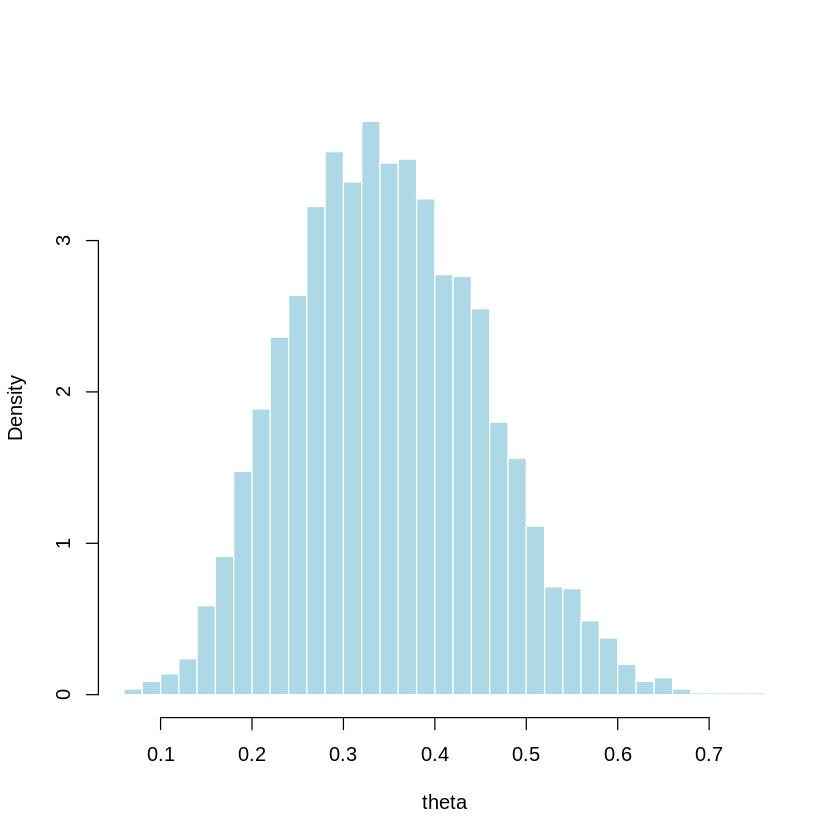

In [29]:
ex <- extract(fit, permuted=TRUE)
hist(ex$theta, breaks=40, col="lightblue", border="white", xlab="theta", main ="", freq=FALSE)


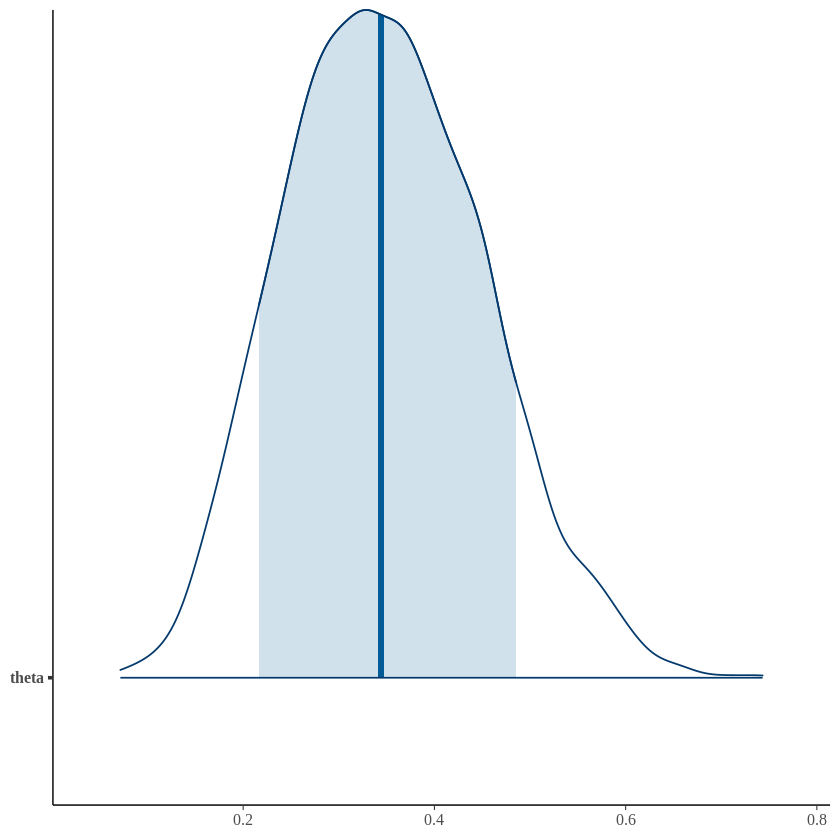

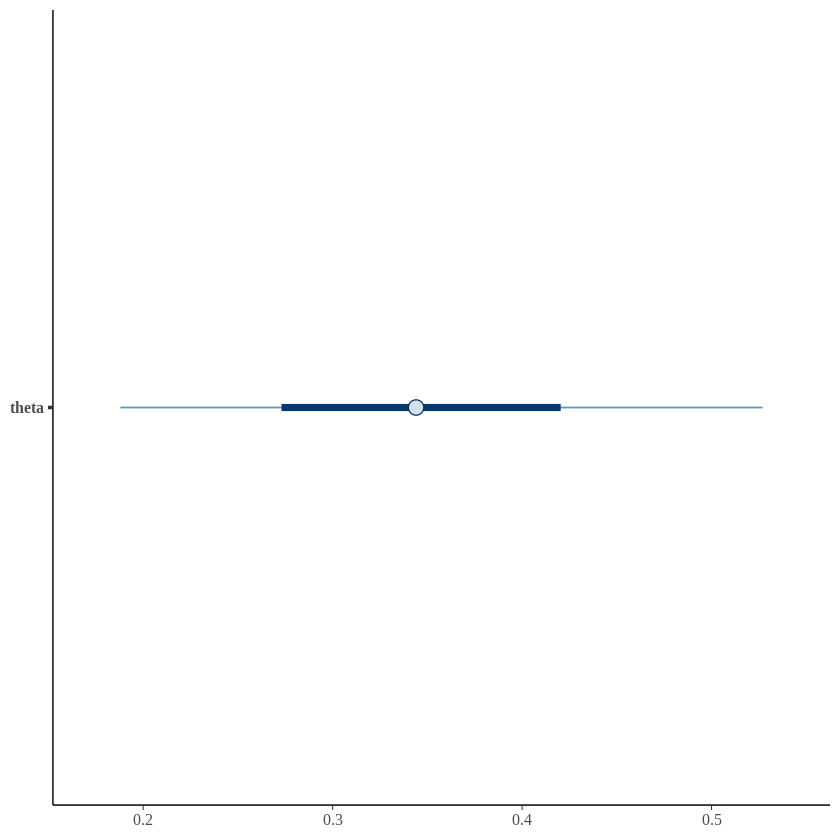

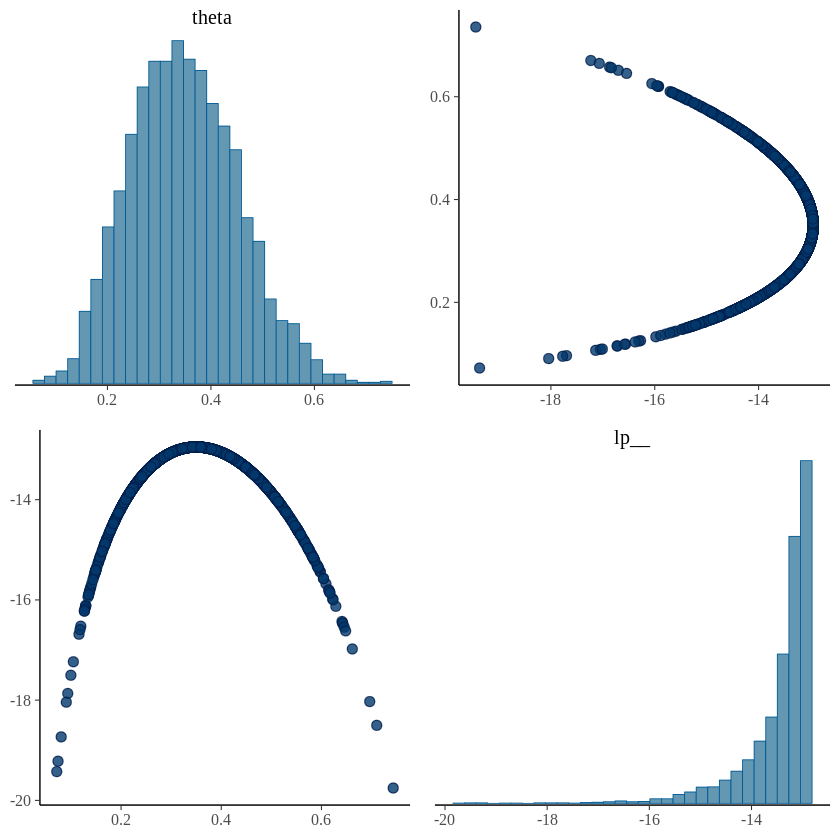

In [30]:
library(bayesplot)
mcmc_areas(as.array(fit), pars = c("theta"), prob = .8 )
mcmc_intervals(as.array(fit), par="theta" )
mcmc_pairs(as.array(fit))

### Analytical computation of the posterior

$$x|p \sim Bin(m,p)$$

Likelihood function: $$ L = p^ {\sum x_i} (1-p)^{\sum x_i} * C$$

Prior: $$ Prior(p) \sim Beta(\alpha,\beta)$$

so PDF of Beta distribution becomes:

$$ PDF(p) = \frac{\Gamma(\alpha+\beta)}{\Gamma\alpha\Gamma\beta}p^{(\alpha-1)}(1-p)^{\beta-1}$$

simplified to 

$$ PDF(p) = constant * p^{(\alpha-1)}(1-p)^{\beta-1}$$

We know that:

$$f(p|x) \propto p^{(\alpha+\sum x_i -1)} (1-p)^{(nm+\beta-\sum x_i -1)} $$

When compared with the Beta distribution PDF, $\alpha$ is replaced by $(\alpha + \sum x_i)$ and $\beta$ is replaced by $(nm+\beta-sum x_i)$, so:


$$posterior(p|x) \sim Beta(\alpha+\sum x_i, nm+\beta-\sum x_i)$$



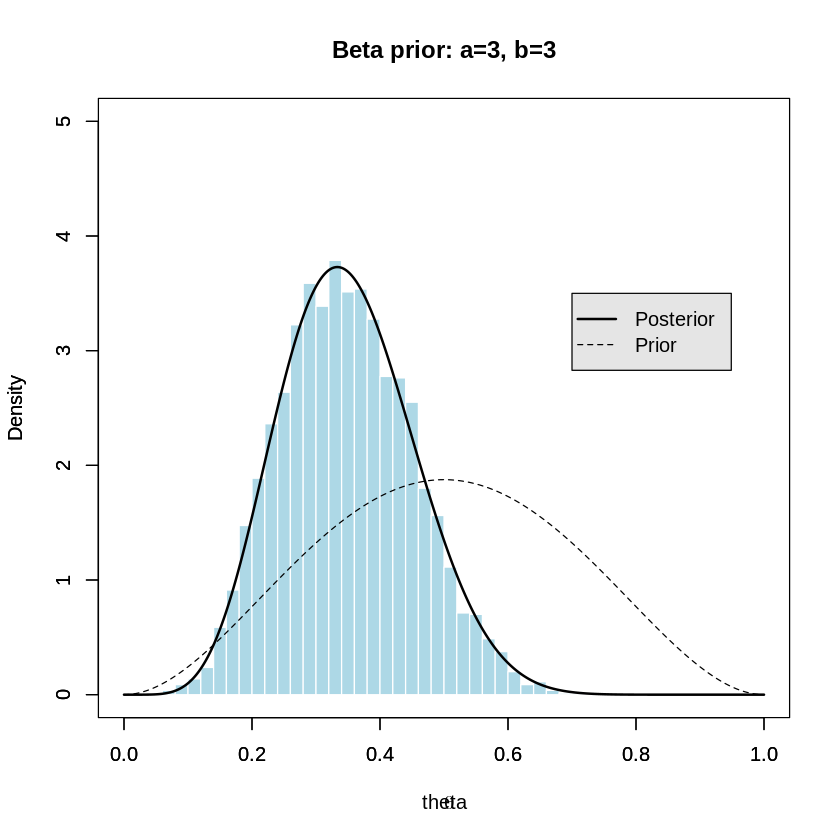

In [32]:
# comparison between STAN distribution and betabinomial

hist(ex$theta, xlim=c(0,1), ylim=c(0,5),breaks=40,col="lightblue", border="white", xlab="theta", main ="", freq=FALSE)
par(new=TRUE)
pi <- Vectorize(function(theta)  dbeta(theta,3,3))
pi6 <- Vectorize(function(theta)  dbeta(theta,3+4,3+10))
curve(pi6, xlim=c(0,1), ylim=c(0,5),xlab=~theta, ylab="Density", main="Beta prior: a=3, b=3", lwd=2,n=10000)
curve(pi, xlim=c(0,1), ylim=c(0,5),xlab=~theta,lwd=1,lty = 2, add=T,n=10000)
legend(0.7, 3.5, c("Posterior","Prior"), col=c("black","black"),
       text.col = "black", lty = c(1, 2), lwd = c(2,1),
       merge = TRUE, bg = "gray90",cex=1)